In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('FakeNewsNet.csv')

In [3]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:
df.tail()

,title,news_url,source_domain,tweet_num,real
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0
23195,Kelly Clarkson Performs a Medley of Kendrick L...,https://www.billboard.com/articles/news/bbma/8...,www.billboard.com,85,1


In [5]:
df.size

115980

In [6]:
df.shape

(23196, 5)

In [7]:
df.isna().sum()

,0
title,0
news_url,330
source_domain,330
tweet_num,0
real,0


In [11]:
df.fillna({'source_domain':'UNKNOWN'},inplace=True)
df.fillna({'news_url':'UNKNOWN'},inplace=True)


In [10]:
df.isna().sum()

,0
title,0
news_url,0
source_domain,0
tweet_num,0
real,0


In [46]:
X_text = df['title']
y = df['real']


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[['tweet_num']])

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text_tfidf = vectorizer.fit_transform(X_text)

In [37]:

X = np.hstack((X_text_tfidf.toarray(), X_num_scaled))


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=500)

model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [40]:
# Make predictions
y_pred = model.predict(x_test)

In [42]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8385775862068966


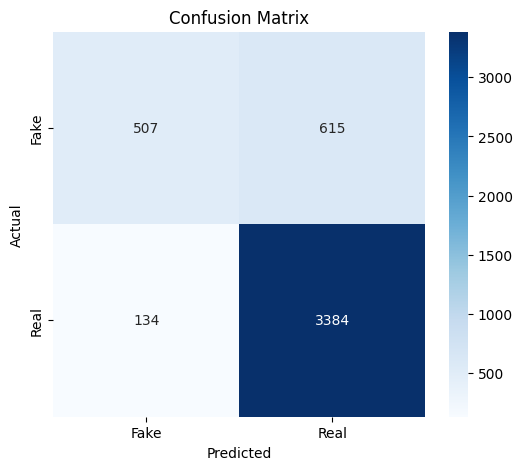

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [50]:
# Example news
new_title = ["Breaking! Celebrity caught in scandal!"]
new_tweet_num = [[1200]]


new_title_tfidf = vectorizer.transform(new_title)


import numpy as np
new_X = np.hstack((new_title_tfidf.toarray(), new_tweet_num))

prediction = model.predict(new_X)
print("Prediction:", "Real" if prediction[0] == 1 else "Fake")


Prediction: Fake
